In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from libpysal.weights import Queen
import pysal as ps
import pysal.viz as viz
import libpysal as lps
import mapclassify
import seaborn as sns
import esda
from spreg import OLS, ML_Error, ML_Lag

Error in sys.excepthook:
Traceback (most recent call last):
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'UnicodeDecodeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 851, in structured_traceback
    

Prepare Data

In [2]:
stations=gpd.read_file("datacode/data/stations.shp")
stations = stations.to_crs(epsg=27700)
stations

Error in sys.excepthook:
Traceback (most recent call last):
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'UnicodeDecodeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 851, in structured_traceback
    

,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y,geometry
0,291,477,Abbey Road,539077,183399,None,DLR,3,0.005308,51.531865,POINT (539191.182 183345.370)
1,258,162,Acton Central,520632,180296,None,London Overground,3,-0.261566,51.508218,POINT (520743.753 180242.117)
2,225,204,Acton Town,519478,179592,"District, Piccadilly",London Underground,3,-0.278433,51.502137,POINT (519589.216 179538.188)
3,455,421,Addington Village,537066,163744,None,Tramlink,6,-0.031284,51.355710,POINT (537179.725 163687.793)
4,422,425,Addiscombe,534188,166297,None,Tramlink,5,-0.071626,51.379342,POINT (534301.835 166241.053)
...,...,...,...,...,...,...,...,...,...,...,...
474,323,64,Woodford,540950,191740,Central,London Underground,4,0.035641,51.606360,POINT (541064.331 191687.391)
475,477,363,Woodgrange Park,541821,185350,None,London Overground,0,0.045631,51.548716,POINT (541935.437 185296.632)
476,424,427,Woodside,534701,167101,None,Tramlink,5,-0.063966,51.386453,POINT (534813.992 167045.890)
477,343,264,Woodside Park,525718,192588,Northern,London Underground,4,-0.183907,51.617590,POINT (525830.889 192535.652)


In [3]:
df = gpd.read_file('datacode/data/lsoa_IMD_airbnb_housing/lsoa_IMD_airbnb_housing.shp')
df

Error in sys.excepthook:
Traceback (most recent call last):
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'UnicodeDecodeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 851, in structured_traceback
    

,Code,Area,Year,Value,Measure,LSOA11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,...,EduScore,HeaScore,CriScore,BaHScore,EnvScore,Mean Price,Small Host,Multiple L,Property C,geometry
0,E01000001,City of London 001A,Year ending Dec 2017,1204928.0,Mean,City of London 001A,1465,1465,0,112.9,...,0.0,-1.7,-2.0,29.5,31.9,159.083333,4.0,8.0,12.0,"POLYGON ((532105.330 182017.386, 532162.728 18..."
1,E01000002,City of London 001B,Year ending Dec 2017,991549.0,Mean,City of London 001B,1436,1436,0,62.9,...,0.1,-1.1,-2.3,24.4,23.1,155.000000,8.0,6.0,14.0,"POLYGON ((532747.048 181793.042, 532671.921 18..."
2,E01000003,City of London 001C,Year ending Dec 2017,913007.0,Mean,City of London 001C,1346,1250,96,227.7,...,5.8,-0.1,-1.0,40.1,40.5,93.466667,10.0,5.0,15.0,"POLYGON ((532135.385 182204.275, 532158.489 18..."
3,E01000005,City of London 001E,Year ending Dec 2017,0.0,Mean,City of London 001E,985,985,0,52.0,...,22.3,-0.1,-1.3,39.9,29.0,151.324074,33.0,75.0,108.0,"POLYGON ((533808.170 180773.910, 533649.287 18..."
4,E01000006,Barking and Dagenham 016A,Year ending Dec 2017,354300.0,Mean,Barking and Dagenham 016A,1703,1699,4,116.2,...,14.8,-0.4,-0.1,45.2,26.9,57.000000,2.0,2.0,4.0,"POLYGON ((545122.084 184321.013, 545271.951 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,Year ending Dec 2017,315553.0,Mean,Greenwich 007F,1352,1352,0,107.6,...,7.8,-0.4,-0.2,40.5,12.5,53.076923,12.0,1.0,13.0,"POLYGON ((544642.760 179830.773, 544766.392 17..."
4831,E01033743,Greenwich 002H,Year ending Dec 2017,286682.0,Mean,Greenwich 002H,2038,2038,0,20.4,...,9.2,-0.2,0.2,50.3,11.9,121.666667,4.0,2.0,6.0,"POLYGON ((546579.271 181103.898, 546687.117 18..."
4832,E01033744,Greenwich 007G,Year ending Dec 2017,294493.0,Mean,Greenwich 007G,1845,1728,117,125.8,...,17.9,0.9,0.4,37.3,14.2,101.318182,11.0,11.0,22.0,"POLYGON ((544536.564 179453.221, 544602.707 17..."
4833,E01033745,Greenwich 002I,Year ending Dec 2017,310000.0,Mean,Greenwich 002I,1820,1820,0,32.3,...,9.8,-0.2,-0.3,45.1,14.8,98.285714,6.0,1.0,7.0,"POLYGON ((546415.827 180158.362, 546320.798 18..."


In [4]:
N = []
for i in range(len(df)):
    buff = df['geometry'][i].buffer(1000)
    stations_nearby = stations[stations.geometry.within(buff)] # restrict the station points to those within this area
    n = len(stations_nearby)
    N.append(n)
df['stations_number_buffer'] = pd.DataFrame(N)
df

,Code,Area,Year,Value,Measure,LSOA11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,...,HeaScore,CriScore,BaHScore,EnvScore,Mean Price,Small Host,Multiple L,Property C,geometry,stations_number_buffer
0,E01000001,City of London 001A,Year ending Dec 2017,1204928.0,Mean,City of London 001A,1465,1465,0,112.9,...,-1.7,-2.0,29.5,31.9,159.083333,4.0,8.0,12.0,"POLYGON ((532105.330 182017.386, 532162.728 18...",14
1,E01000002,City of London 001B,Year ending Dec 2017,991549.0,Mean,City of London 001B,1436,1436,0,62.9,...,-1.1,-2.3,24.4,23.1,155.000000,8.0,6.0,14.0,"POLYGON ((532747.048 181793.042, 532671.921 18...",15
2,E01000003,City of London 001C,Year ending Dec 2017,913007.0,Mean,City of London 001C,1346,1250,96,227.7,...,-0.1,-1.0,40.1,40.5,93.466667,10.0,5.0,15.0,"POLYGON ((532135.385 182204.275, 532158.489 18...",12
3,E01000005,City of London 001E,Year ending Dec 2017,0.0,Mean,City of London 001E,985,985,0,52.0,...,-0.1,-1.3,39.9,29.0,151.324074,33.0,75.0,108.0,"POLYGON ((533808.170 180773.910, 533649.287 18...",15
4,E01000006,Barking and Dagenham 016A,Year ending Dec 2017,354300.0,Mean,Barking and Dagenham 016A,1703,1699,4,116.2,...,-0.4,-0.1,45.2,26.9,57.000000,2.0,2.0,4.0,"POLYGON ((545122.084 184321.013, 545271.951 18...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,Year ending Dec 2017,315553.0,Mean,Greenwich 007F,1352,1352,0,107.6,...,-0.4,-0.2,40.5,12.5,53.076923,12.0,1.0,13.0,"POLYGON ((544642.760 179830.773, 544766.392 17...",1
4831,E01033743,Greenwich 002H,Year ending Dec 2017,286682.0,Mean,Greenwich 002H,2038,2038,0,20.4,...,-0.2,0.2,50.3,11.9,121.666667,4.0,2.0,6.0,"POLYGON ((546579.271 181103.898, 546687.117 18...",0
4832,E01033744,Greenwich 007G,Year ending Dec 2017,294493.0,Mean,Greenwich 007G,1845,1728,117,125.8,...,0.9,0.4,37.3,14.2,101.318182,11.0,11.0,22.0,"POLYGON ((544536.564 179453.221, 544602.707 17...",1
4833,E01033745,Greenwich 002I,Year ending Dec 2017,310000.0,Mean,Greenwich 002I,1820,1820,0,32.3,...,-0.2,-0.3,45.1,14.8,98.285714,6.0,1.0,7.0,"POLYGON ((546415.827 180158.362, 546320.798 18...",0


In [5]:
# Read in the listing_price (dependent variable) into an array y
y = np.array(df['stations_number_buffer'])
y.shape = (len(y),1)
# value for independent variables into a one dimmensional array X.
# You can feel free to change the independant variables
X= []
X.append(df['USUALRES']) # population density
X.append(df['Mean Price']) # average rent price
X.append(df['IncScore']) # Income score in 2019
X.append(df['IMDScore']) # Deprivation index in 2019
X.append(df['EmpScore'])
X.append(df['EduScore'])
X = np.array(X).T

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = df[['stations_number_buffer','USUALRES','Mean Price','IncScore','IMDScore','EmpScore','EduScore']]
X1[7]=1
variance_inflation_factor(X1.values, 1)

C:\Users\12789\AppData\Local\Temp\ipykernel_25208\742948973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[7]=1


1.0251782160391514

In [7]:
x = ['USUALRES', 'Mean Price', 'IncScore', 'IMDScore', 'EmpScore', 'EduScore'] # define input/independant variables
X = df.loc[:, x].dropna()
y = np.array(df['stations_number_buffer']) # define output/dependant variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model_c = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model_c.predict(X)
# Print out the statistics
model_c.summary()


D:\anaconda\envs\msda2021\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          1.48e-171
Time:                        04:11:23   Log-Likelihood:                -11508.
No. Observations:                4835   AIC:                         2.303e+04
Df Residuals:                    4828   BIC:                         2.308e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0615      0.250      0.246      0.806      -0.429       0.552
USUALRES       0.0006      0.000      4.093      0.000       0.000       0.001
Mean Price     0.0041      0.000     12.943      0.000       0.003       0.005
IncScore      -3.5042      1.019     -3.440      0.001      -5.501      -1.507
IMDScore       0.1650      0.009     18.421      0.000       0.147       0.183
EmpScore      -6.9846      1.097     -6.367      0.000      -9.135      -4.834
EduScore      -0.1089      0.006    -19.573      0.000      -0.120      -0.098
==============================================================================
Omnibus:                     1511.322   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5851.254
Skew:                           1.512   Prob(JB):                         0.00
Kurtosis:                       7.462   Cond. No.                     5.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
w_queen = Queen.from_dataframe(df)
w_queen.n

4835

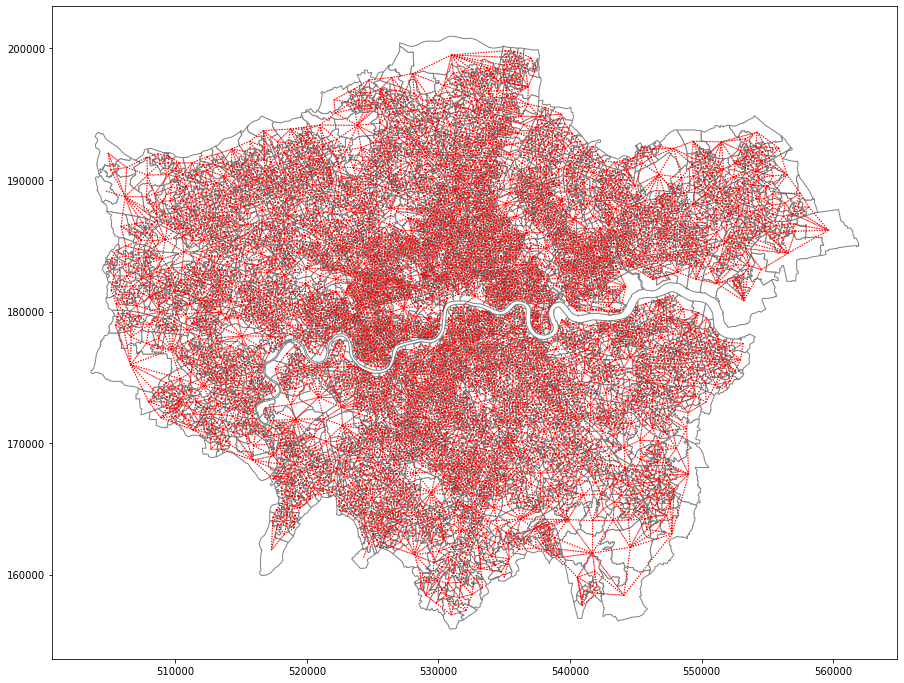

In [9]:
ax = df.plot(edgecolor='grey', facecolor='w', figsize=(20, 12))
f,ax = w_queen.plot(df, ax=ax,
                    edge_kws=dict(color='r', linestyle=':', linewidth=1),
                    node_kws=dict(marker=''))

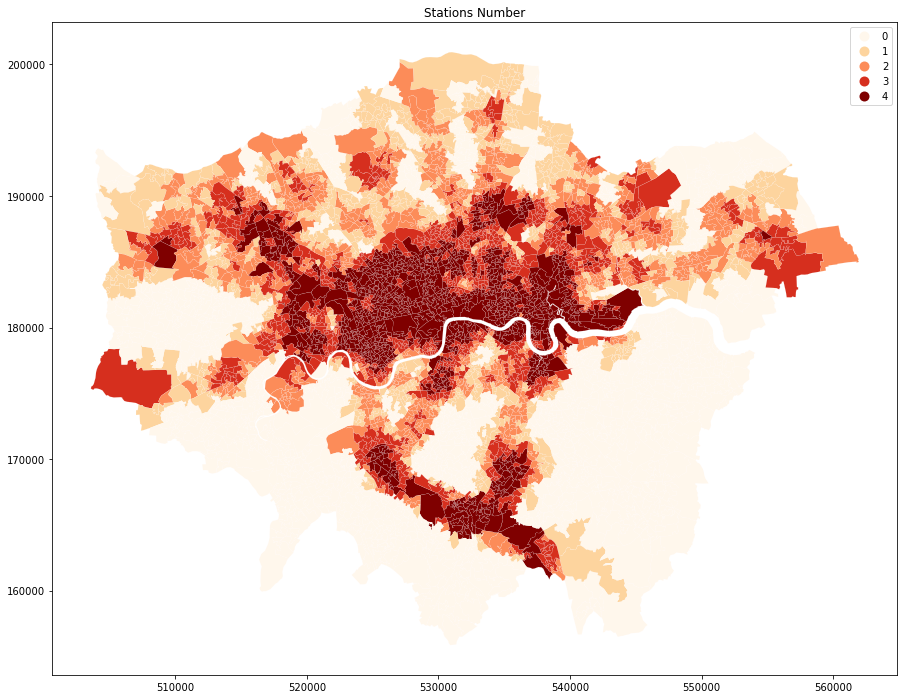

In [10]:
pr = ps.viz.mapclassify.Quantiles(df['stations_number_buffer'], k=5)
f, ax = plt.subplots(1, figsize=(20, 12))
df.assign(cl_pr=pr.yb).plot(column='cl_pr', categorical=True, k=5, cmap='OrRd',
                             linewidth=0.1, ax=ax, edgecolor='white', legend=True)

plt.title('Stations Number')
plt.show()

In [11]:
W_queen = lps.weights.Queen.from_shapefile('datacode/data/lsoa_IMD_airbnb_housing/lsoa_IMD_airbnb_housing.shp')
W_queen.transform = 'r' # row-standardize the contiguity weights

In [12]:
number_Lag = lps.weights.lag_spatial(W_queen, df['stations_number_buffer']) #spatial lag of the variable
number_LagQ5 = mapclassify.Quantiles(df['stations_number_buffer'], k=5) # let's say k=5 for example

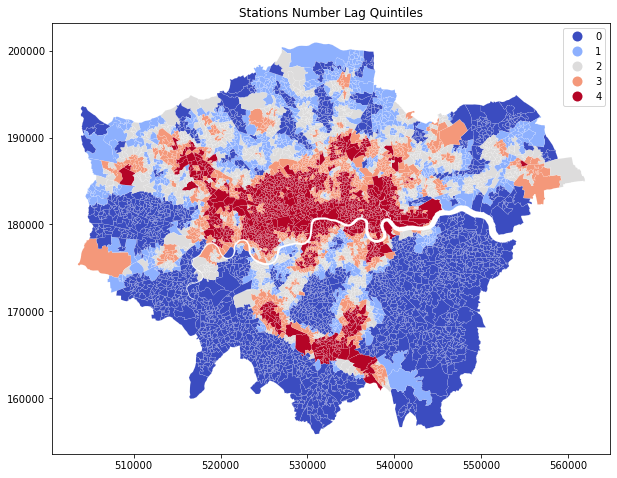

In [13]:
f, ax = plt.subplots(1, figsize=(10, 8))
df.assign(cl_lag=number_LagQ5.yb).plot(column='cl_lag', categorical=True, k=5, cmap='coolwarm', linewidth=0.1, ax=ax, edgecolor='white', legend=True)
plt.title('Stations Number Lag Quintiles')
plt.show()

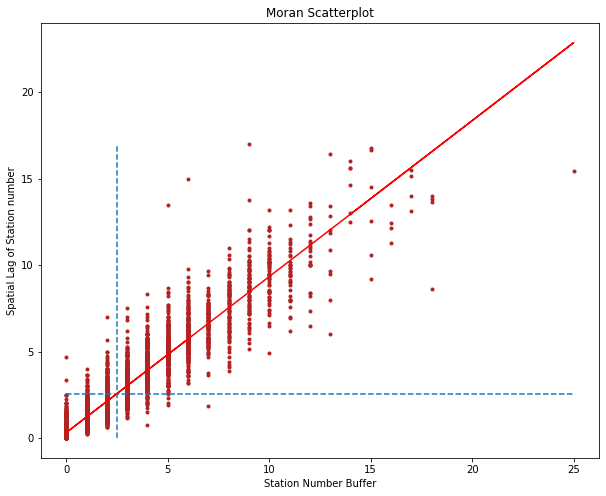

In [14]:
number=df['stations_number_buffer']
b,a = np.polyfit(number, number_Lag, 1)
f, ax = plt.subplots(1, figsize=(10, 8))
plt.plot(number, number_Lag, '.', color='firebrick')

# dashed vert at mean of the last year's private rent level
plt.vlines(number.mean(), number_Lag.min(), number_Lag.max(), linestyle='--')
# dashed horizontal at mean of lagged private rent
plt.hlines(number_Lag.mean(), number.min(), number.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(number, a + b*number, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Station number')
plt.xlabel('Station Number Buffer')
plt.show()

In [15]:
# your code here
df['number_std'] = (df['stations_number_buffer'] - df['stations_number_buffer'].mean()) / df['stations_number_buffer'].std()
df['w_number_std'] = lps.weights.lag_spatial(w_queen, df['number_std'])

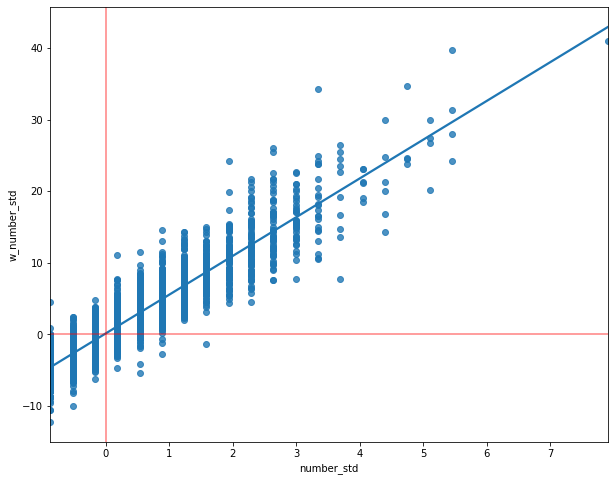

In [16]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(10, 8))
# Plot values
sns.regplot(x='number_std', y='w_number_std', data=df, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='r', alpha=0.5)
plt.axhline(0, c='r', alpha=0.5)
# Display
plt.show()

In [17]:
binary = df['stations_number_buffer']> df['stations_number_buffer'].median()
sum(binary)

1774

In [18]:
labels = ['Low Number', 'High Number']
binary = [labels[i] for i in 1*binary]
df['binary'] = binary

Text(0.5, 82.2682559301017, "Moran's I")

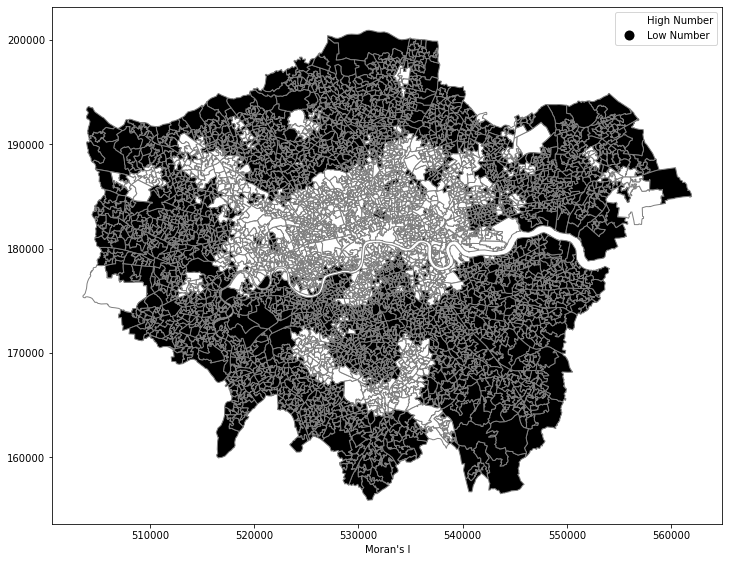

In [19]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
df.plot(column='binary', cmap='binary', edgecolor='grey', legend=True, ax=ax)
plt.xlabel("Moran's I")

In [20]:
I_price = esda.Moran(df['stations_number_buffer'].values, w_queen)  # Moran's I
I_price.I, I_price.p_sim  #value of statistic, inference on Moran's I

(0.9014799541490874, 0.001)

In [21]:
mi = esda.Moran(df['stations_number_buffer'], w_queen, two_tailed=False)
print("The Statistic Moran's I is: "+str("%.4f"%mi.I),
      "\nThe Expected Value for Statistic I is: "+str("%.4f"%mi.EI),
      "\nThe Significance Test Value is: "+str("%.4f"%mi.p_norm))

The Statistic Moran's I is: 0.9015 
The Expected Value for Statistic I is: -0.0002 
The Significance Test Value is: 0.0000


In [22]:
# Read in the listing_price (dependent variable) into an array y
y = np.array(df['stations_number_buffer'])
y.shape = (len(y),1)
# value for independent variables into a one dimmensional array X.
# You can feel free to change the independant variables
X= []
X.append(df['USUALRES']) # population density
X.append(df['Mean Price']) # average rent price
X.append(df['IncScore']) # Income score in 2019
X.append(df['IMDScore']) # Deprivation index in 2019
X.append(df['EmpScore'])
X.append(df['EduScore'])
X = np.array(X).T

In [23]:
spat_lag = ML_Lag(y,X,w_queen,name_y='stations_number_buffer',
                  name_x=['USUALRES', 'Mean Price', 'IncScore', 'IMDScore', 'EmpScore','EduScore'],
                  name_w='w_queen', name_ds='lsoa_station_number')
print(spat_lag.summary)

D:\anaconda\envs\msda2021\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :lsoa_station_number
Weights matrix      :     w_queen
Dependent Variable  :stations_number_buffer                Number of Observations:        4835
Mean dependent var  :      2.4898                Number of Variables   :           8
S.D. dependent var  :      2.8438                Degrees of Freedom    :        4827
Pseudo R-squared    :      0.8932
Spatial Pseudo R-squared:  0.2283
Sigma-square ML     :       0.886                Log likelihood        :   -7147.708
S.E of regression   :       0.941                Akaike info criterion :   14311.415
                                                 Schwarz criterion     :   14363.285

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------

In [24]:
spat_err = ML_Error(y,X,w_queen, name_y='stations_number_buffer',
                    name_x=['USUALRES', 'Mean Price', 'IncScore', 'IMDScore', 'EmpScore','EduScore'],
                    name_w='w_queen', name_ds='lsoa_station_number')
print(spat_err.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :lsoa_station_number
Weights matrix      :     w_queen
Dependent Variable  :stations_number_buffer                Number of Observations:        4835
Mean dependent var  :      2.4898                Number of Variables   :           7
S.D. dependent var  :      2.8438                Degrees of Freedom    :        4828
Pseudo R-squared    :      0.0850
Sigma-square ML     :       0.879                Log likelihood        :   -7153.886
S.E of regression   :       0.937                Akaike info criterion :   14321.771
                                                 Schwarz criterion     :   14367.157

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------

In [25]:
from sklearn.metrics import mean_squared_error as mse

m1 = OLS(y,X,w_queen, name_y='stations_number_buffer',
         name_x=['USUALRES', 'Mean Price', 'IncScore', 'IMDScore', 'EmpScore','EduScore'],
         name_w='w_queen', name_ds='lsoa_station_number')

mses = pd.Series({'OLS': mse(y, m1.predy.flatten()),
                  'SL': mse(y, spat_lag.predy.flatten()),
                  'SE': mse(y, spat_err.predy.flatten())
                  })
mses.sort_values()

SL     0.885639
OLS    6.837875
SE     8.512539
dtype: float64

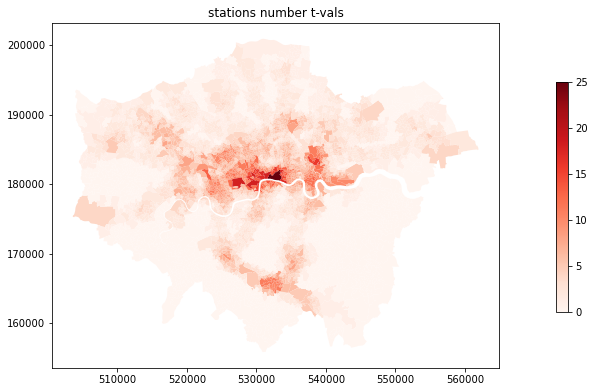

In [26]:
vmin, vmax = np.min(df['stations_number_buffer']), np.max(df['stations_number_buffer'])
ax = df.plot('stations_number_buffer', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Reds')
ax.set_title('stations number'+' t-vals')
fig = ax.get_figure()
cax = fig.add_axes([1.0, 0.3, 0.02, 0.4]) # the position and size of colormap legend bar
sm_price = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Reds')
sm_price._A = []
fig.colorbar(sm_price, cax=cax)

In [27]:
# Prep data into design matrix and coordinates
# Dependent variable
y = df['stations_number_buffer']
y = np.array(y).reshape(-1,1) # make array change the list format

In [28]:
#Design matrix - covariates - intercept added automatically
usual_pop = np.array(df.USUALRES).reshape(-1,1)
rent_price = np.array(df['Mean Price'].values).reshape(-1,1)
income_score = np.array(df.IncScore).reshape(-1,1)
imd_score = np.array(df.IMDScore).reshape(-1,1)
employ_score = np.array(df.EmpScore).reshape(-1,1)
environment_score = np.array(df.EnvScore).reshape(-1,1)

X = np.hstack([usual_pop, rent_price, income_score, imd_score, employ_score, environment_score])
labels = ['Intercept','usual_pop', 'rent_price', 'income_score', 'imd_score', 'employ_score', 'education_score']

# standardization
X_s = (X - X.mean(axis=0)) / X.std(axis=0)
y_s = (y - y.mean(axis=0)) / y.std(axis=0)

In [29]:
#Coordinates for calibration points
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = df['geometry'].centroid
u,v = [list(t) for t in zip(*map(getXY, centroidseries))]

coords = list(zip(u,v))

In [30]:
#Prepare dataset inputs
g_y = df['stations_number_buffer'].values.reshape((-1,1))
g_X = df[['USUALRES','Mean Price','IncScore','IMDScore','EmpScore','EduScore']].values

g_coords = list(zip(u,v))

# Standardised our data to have mean of 0 and standard deviation of 1
g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [31]:
from mgwr.sel_bw import Sel_BW

# Select bandwidth for kernel
bw = Sel_BW(g_coords,
            g_y, # Independent variable
            g_X, # Dependent variable
            fixed=False, # True for fixed bandwidth and false for adaptive bandwidth
            spherical=True) # Spherical coordinates (long-lat) or projected coordinates
# calculate the optimum bandwidth for our local regression
bw.search(bw_min=2)

1581.0

In [32]:
from mgwr.gwr import GWR
#Instantiate GWR model and then estimate parameters and diagnostics using fit method
model = GWR(coords, y, X, bw.bw[0])
results = model.fit()

In [33]:
results.summary()

Model type                                                         Gaussian
Number of observations:                                                4835
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                          32284.345
Log-likelihood:                                                  -11450.678
AIC:                                                              22915.356
AICc:                                                             22917.386
BIC:                                                              -8674.652
R2:                                                                   0.174
Adj. R2:                                                              0.173

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [34]:
# Filtering only significant result at 0.05 (95% confidence interval)
filtered_estimates = results.filter_tvals(alpha=.05)
filtered_estimates

array([[ 5.60606617,  3.12449233,  9.63228859, ..., -4.64167577,
         0.        ,  7.01768773],
       [ 5.87918436,  2.99583458,  9.55903148, ..., -4.51806801,
         0.        ,  6.80095197],
       [ 5.5924722 ,  3.12972559,  9.32747868, ..., -5.00124665,
         0.        ,  7.47543684],
       ...,
       [-4.45247988,  2.96770842,  4.03023831, ...,  5.68657503,
        -4.75622664,  7.46069359],
       [-4.16717196,  2.92211737,  3.4201749 , ...,  5.1434539 ,
        -3.85178727,  6.99360306],
       [ 0.        ,  3.33422285,  7.49344847, ...,  4.09407117,
        -8.50872803,  3.79077421]])

In [35]:
# Convert arrays to data frame
data_params = pd.DataFrame(filtered_estimates)
data_localR2 = pd.DataFrame(results.localR2)

In [36]:
# Create the new dataframe
lsoa = gpd.read_file('datacode/data/LSOA_IMD2019.shp')
df1=pd.DataFrame(lsoa['LSOA11CD'])
df2 = df1.assign(intercept=data_params[0],
                populatin_estimate=data_params[1],
                rent_price_estimate=data_params[2],
                income_estimate=data_params[3],
                IMD_estimate=data_params[4],
                employment_estimate=data_params[5],
                education_estimate=data_params[6],
                localR2=data_localR2[0])
df2

Error in sys.excepthook:
Traceback (most recent call last):
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'UnicodeDecodeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "D:\anaconda\envs\msda2021\lib\site-packages\IPython\core\ultratb.py", line 851, in structured_traceback
    

,LSOA11CD,intercept,populatin_estimate,rent_price_estimate,income_estimate,IMD_estimate,employment_estimate,education_estimate,localR2
0,E01000001,5.606066,3.124492,9.632289,2.730233,-4.641676,0.000000,7.017688,0.237661
1,E01000002,5.879184,2.995835,9.559031,2.765255,-4.518068,0.000000,6.800952,0.232587
2,E01000003,5.592472,3.129726,9.327479,3.029859,-5.001247,0.000000,7.475437,0.226080
3,E01000005,6.573268,2.499918,9.678521,2.456806,-3.108171,-3.230385,5.222578,0.229734
4,E01000006,-2.148562,2.369272,4.401392,0.000000,4.211006,-3.311822,6.630234,0.364420
...,...,...,...,...,...,...,...,...,...
4830,E01033742,-4.338686,2.916424,4.114644,0.000000,5.628208,-4.658417,7.467279,0.415557
4831,E01033743,-3.978681,2.841512,3.786509,0.000000,5.111532,-3.893635,7.170691,0.401925
4832,E01033744,-4.452480,2.967708,4.030238,0.000000,5.686575,-4.756227,7.460694,0.417693
4833,E01033745,-4.167172,2.922117,3.420175,0.000000,5.143454,-3.851787,6.993603,0.401526


In [37]:
data_final = df.merge(df2, left_on='Code', right_on='LSOA11CD')
data_final

,Code,Area,Year,Value,Measure,LSOA11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,...,binary,LSOA11CD,intercept,populatin_estimate,rent_price_estimate,income_estimate,IMD_estimate,employment_estimate,education_estimate,localR2
0,E01000001,City of London 001A,Year ending Dec 2017,1204928.0,Mean,City of London 001A,1465,1465,0,112.9,...,High Number,E01000001,5.606066,3.124492,9.632289,2.730233,-4.641676,0.000000,7.017688,0.237661
1,E01000002,City of London 001B,Year ending Dec 2017,991549.0,Mean,City of London 001B,1436,1436,0,62.9,...,High Number,E01000002,5.879184,2.995835,9.559031,2.765255,-4.518068,0.000000,6.800952,0.232587
2,E01000003,City of London 001C,Year ending Dec 2017,913007.0,Mean,City of London 001C,1346,1250,96,227.7,...,High Number,E01000003,5.592472,3.129726,9.327479,3.029859,-5.001247,0.000000,7.475437,0.226080
3,E01000005,City of London 001E,Year ending Dec 2017,0.0,Mean,City of London 001E,985,985,0,52.0,...,High Number,E01000005,6.573268,2.499918,9.678521,2.456806,-3.108171,-3.230385,5.222578,0.229734
4,E01000006,Barking and Dagenham 016A,Year ending Dec 2017,354300.0,Mean,Barking and Dagenham 016A,1703,1699,4,116.2,...,High Number,E01000006,-2.148562,2.369272,4.401392,0.000000,4.211006,-3.311822,6.630234,0.364420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,Year ending Dec 2017,315553.0,Mean,Greenwich 007F,1352,1352,0,107.6,...,Low Number,E01033742,-4.338686,2.916424,4.114644,0.000000,5.628208,-4.658417,7.467279,0.415557
4831,E01033743,Greenwich 002H,Year ending Dec 2017,286682.0,Mean,Greenwich 002H,2038,2038,0,20.4,...,Low Number,E01033743,-3.978681,2.841512,3.786509,0.000000,5.111532,-3.893635,7.170691,0.401925
4832,E01033744,Greenwich 007G,Year ending Dec 2017,294493.0,Mean,Greenwich 007G,1845,1728,117,125.8,...,Low Number,E01033744,-4.452480,2.967708,4.030238,0.000000,5.686575,-4.756227,7.460694,0.417693
4833,E01033745,Greenwich 002I,Year ending Dec 2017,310000.0,Mean,Greenwich 002I,1820,1820,0,32.3,...,Low Number,E01033745,-4.167172,2.922117,3.420175,0.000000,5.143454,-3.851787,6.993603,0.401526


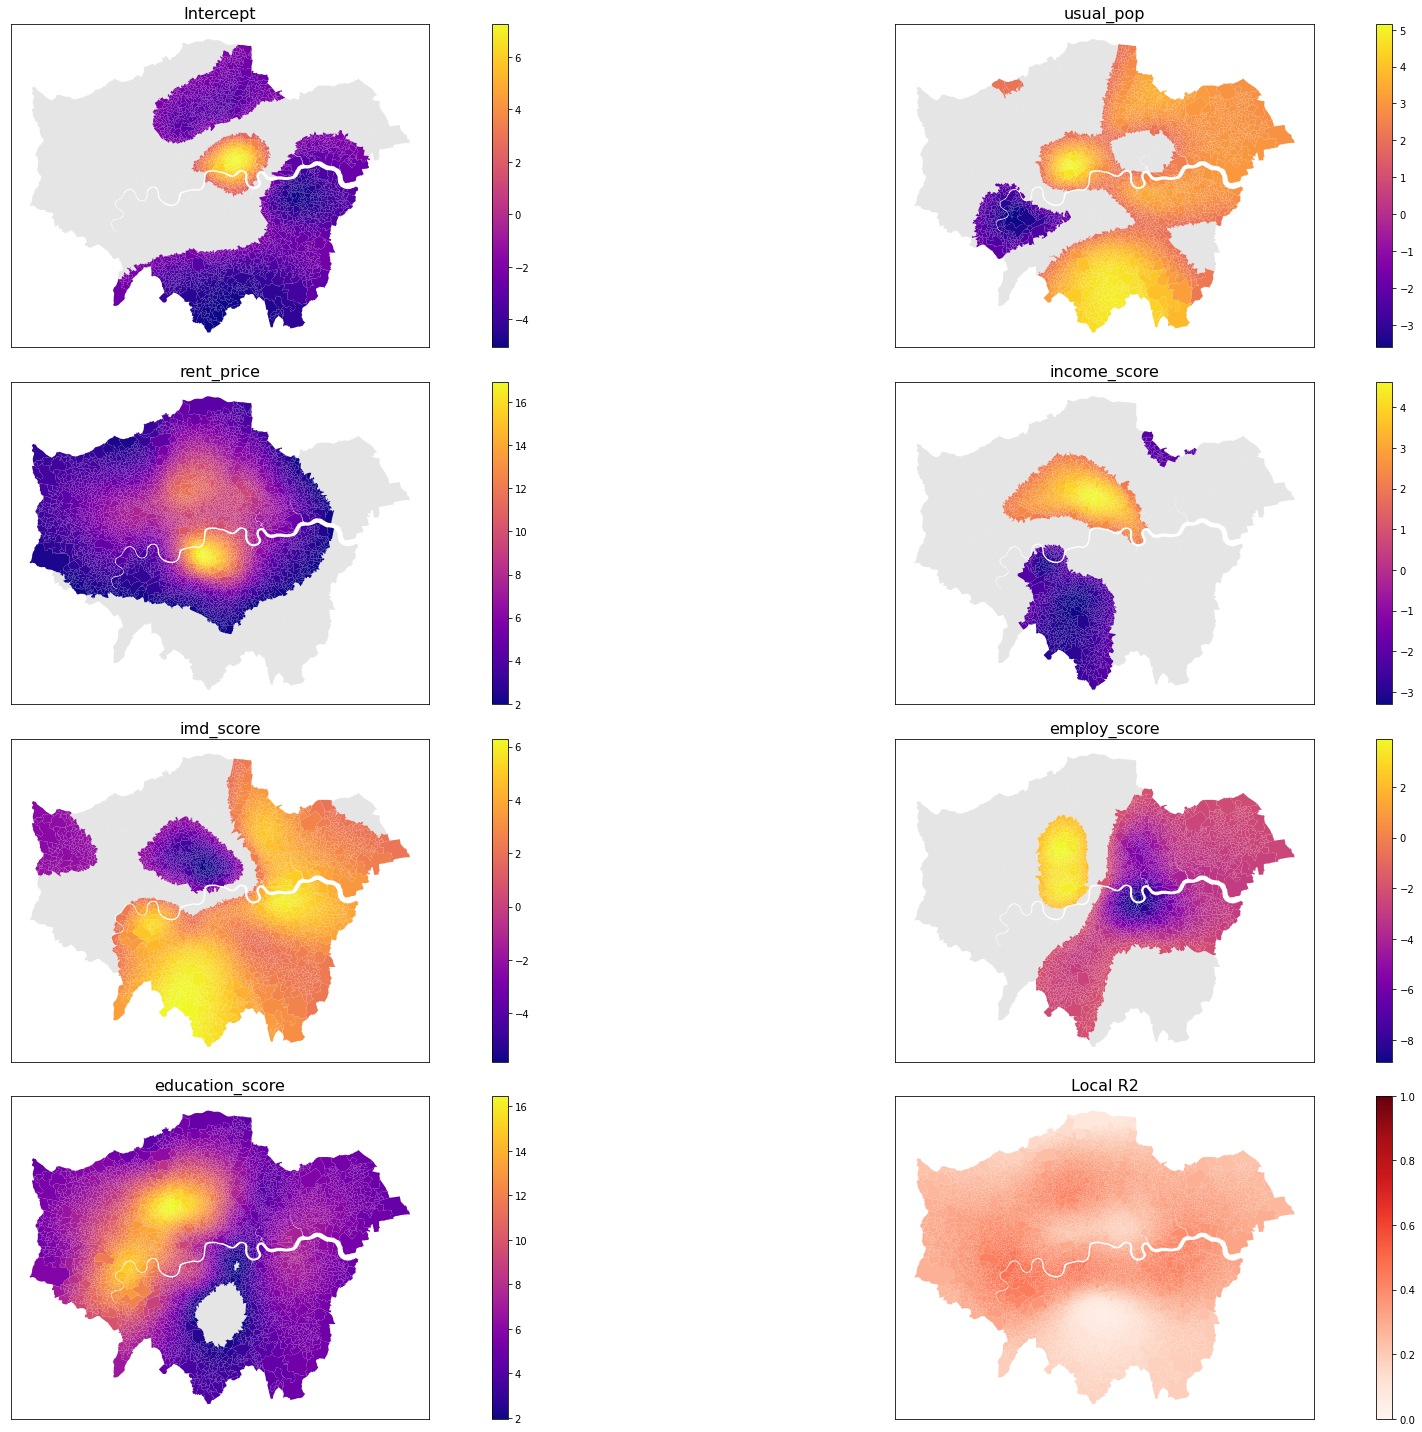

In [38]:
# First, let's create empty set of subplots with 2 rows and 3 columns
f,ax=plt.subplots(4,2,figsize=(30,20), subplot_kw=dict(aspect='equal'))
# Flatten them
ax = ax.flatten()
# Define the title of our plots
titles = ['Intercept','usual_pop', 'rent_price', 'income_score', 'imd_score', 'employ_score', 'education_score']

# Here, we are creating loop for our parameter estimates
for i,row in enumerate(filtered_estimates.T):
    # We want to plot all the non-significant estimates in grey
    data_temp = data_final.assign(toplot=filtered_estimates.T[i])
    (data_temp.query('toplot==0')
     .sort_values('toplot')
     .plot(color='grey',ax=ax[i],alpha=.2))

    # and assign colours only to the significant estimates
    (data_temp.query('toplot!=0')
     .sort_values('toplot')
     .plot('toplot',
           cmap='plasma',
           ax=ax[i],
           legend=True))

    ax[i].set_title(titles[i], fontsize=16)

    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

# For the last one, local R2, we can just map all of them regarding the significance

(data_final.assign(r2=results.localR2)
 .sort_values('r2')
 .plot('r2',
       ax=ax[-1],
       legend=True,
       vmin=0,
       vmax=1,
       cmap='Reds'))

ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])

ax[-1].set_title('Local R2', fontsize=16)


f.tight_layout()

plt.show()